# Image Classification Neural Network


Training a neural network involves following tasks
1. Dataset preparation
2. Loading dataset
3. Defining model architecture
4. Training

    a. Forward pass and Loss calculation

    b. Backward pass and Optimisation
5. Testing

_Assuming dataset is already preprocessed and ready to be used for training_

#### MNIST Digit classification


device =  cuda


100%|██████████| 9912422/9912422 [00:00<00:00, 168013219.55it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

100%|██████████| 28881/28881 [00:00<00:00, 122855673.25it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 147728108.44it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20934647.00it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



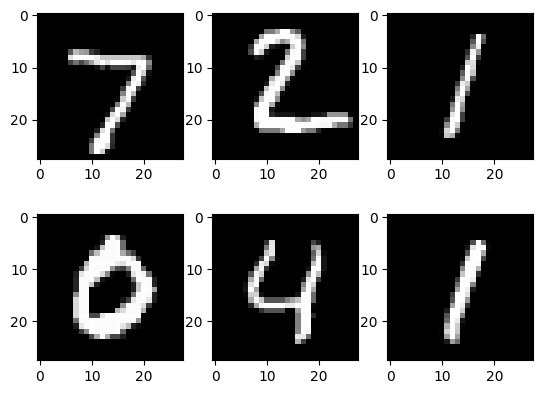

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device = ', device)

# Hyper params
input_size = 784  #28 *28
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# builtin MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                          train = True,
                                          transform = transforms.ToTensor(),
                                          download = True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train = False,
                                          transform = transforms.ToTensor(),
                                          )
# Data Loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

examples = iter(test_loader)
example_data, example_target = next(examples)

for i in range(6):
  plt.subplot(2, 3, (i+1))
  plt.imshow(example_data[i][0], cmap = 'gray')
plt.show()

In [18]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn. Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    # no activation and no softmax at end as per CELoss documentation
    return out

# model obj
model = NeuralNet(input_size, hidden_size, num_classes)
# print(model)

model.to(device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=500, out_features=10, bias=True)
)

In [19]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Training model
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origional shape (batchsize, channel, width, height) (100, 1, 28, 28)
    # resized (100, 784) as flattened
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward pass and loss calculation
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimization
    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    if (i+1) % 100 == 0:
      print(f'Epoch: {epoch+1}/{num_epochs}, step [{i+1}/{n_total_steps}], Loss: {loss:.3f}')

Epoch: 1/5, step [100/600], Loss: 0.265
Epoch: 1/5, step [200/600], Loss: 0.185
Epoch: 1/5, step [300/600], Loss: 0.152
Epoch: 1/5, step [400/600], Loss: 0.127
Epoch: 1/5, step [500/600], Loss: 0.216
Epoch: 1/5, step [600/600], Loss: 0.120
Epoch: 2/5, step [100/600], Loss: 0.087
Epoch: 2/5, step [200/600], Loss: 0.084
Epoch: 2/5, step [300/600], Loss: 0.111
Epoch: 2/5, step [400/600], Loss: 0.174
Epoch: 2/5, step [500/600], Loss: 0.060
Epoch: 2/5, step [600/600], Loss: 0.107
Epoch: 3/5, step [100/600], Loss: 0.147
Epoch: 3/5, step [200/600], Loss: 0.070
Epoch: 3/5, step [300/600], Loss: 0.032
Epoch: 3/5, step [400/600], Loss: 0.144
Epoch: 3/5, step [500/600], Loss: 0.083
Epoch: 3/5, step [600/600], Loss: 0.088
Epoch: 4/5, step [100/600], Loss: 0.064
Epoch: 4/5, step [200/600], Loss: 0.025
Epoch: 4/5, step [300/600], Loss: 0.040
Epoch: 4/5, step [400/600], Loss: 0.040
Epoch: 4/5, step [500/600], Loss: 0.031
Epoch: 4/5, step [600/600], Loss: 0.018
Epoch: 5/5, step [100/600], Loss: 0.040


In [20]:
#  Test the model
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  accuracy = n_correct / n_samples
  print(f'Accuracy of model on {n_samples} test images: {100*accuracy}')

Accuracy of model on 10000 test images: 97.98


In [21]:
from torchsummary import summary

print(summary(model, (1, input_size)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]         392,500
              ReLU-2               [-1, 1, 500]               0
            Linear-3                [-1, 1, 10]           5,010
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.52
Estimated Total Size (MB): 1.53
----------------------------------------------------------------
None


## CNN based classification


In [22]:
# MNIST classification with CNN
class ConvNet(nn. Module):
  def __init__(self, num_classes):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)

    self.pool = nn.MaxPool2d(2, 2)

    self.conv2 = nn.Conv2d(32, 64, 3)

    self.conv3 = nn.Conv2d(64, 128, 3)

    self.fc1 = nn.Linear(128*3*3, 128)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(128, num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu(out)
    out = self.pool(out)

    out = self.conv2(out)
    out = self.relu(out)
    out = self.pool(out)

    out = self.conv3(out)
    out = self.relu(out)

    # print(f"shape before flattening : {out.shape}")
    out = torch.flatten(out, 1)

    out = self.fc1(out)
    out = self.relu(out)
    out = self.fc2(out)

    # no activation and no softmax at end as per CELoss documentation
    return out

# instantiate the model
cnn_model = ConvNet(num_classes)

cnn_model.to(device)

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [23]:
# print model summary
from torchsummary import summary

print(summary(cnn_model, (1, 28, 28)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7            [-1, 128, 3, 3]          73,856
              ReLU-8            [-1, 128, 3, 3]               0
            Linear-9                  [-1, 128]         147,584
             ReLU-10                  [-1, 128]               0
           Linear-11                   [-1, 10]           1,290
Total params: 241,546
Trainable params: 241,546
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [27]:
learning_rate = 0.01
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr = learning_rate)

# Training model
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origional shape (batchsize, channel, width, height) (100, 1, 28, 28)
    # resized (100, 784) as flattened
    # print(images.shape)
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass and loss calculation
    outputs = cnn_model(images)
    loss = criterion(outputs, labels)

    # Backward and optimization
    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    if (i+1) % 100 == 0:
      print(f'Epoch: {epoch+1}/{num_epochs}, step [{i+1}/{n_total_steps}], Loss: {loss:.3f}')

Epoch: 1/5, step [100/600], Loss: 0.209
Epoch: 1/5, step [200/600], Loss: 0.167
Epoch: 1/5, step [300/600], Loss: 0.121
Epoch: 1/5, step [400/600], Loss: 0.094
Epoch: 1/5, step [500/600], Loss: 0.088
Epoch: 1/5, step [600/600], Loss: 0.117
Epoch: 2/5, step [100/600], Loss: 0.027
Epoch: 2/5, step [200/600], Loss: 0.220
Epoch: 2/5, step [300/600], Loss: 0.100
Epoch: 2/5, step [400/600], Loss: 0.016
Epoch: 2/5, step [500/600], Loss: 0.096
Epoch: 2/5, step [600/600], Loss: 0.045
Epoch: 3/5, step [100/600], Loss: 0.046
Epoch: 3/5, step [200/600], Loss: 0.078
Epoch: 3/5, step [300/600], Loss: 0.018
Epoch: 3/5, step [400/600], Loss: 0.024
Epoch: 3/5, step [500/600], Loss: 0.014
Epoch: 3/5, step [600/600], Loss: 0.130
Epoch: 4/5, step [100/600], Loss: 0.038
Epoch: 4/5, step [200/600], Loss: 0.018
Epoch: 4/5, step [300/600], Loss: 0.008
Epoch: 4/5, step [400/600], Loss: 0.006
Epoch: 4/5, step [500/600], Loss: 0.030
Epoch: 4/5, step [600/600], Loss: 0.038
Epoch: 5/5, step [100/600], Loss: 0.052


In [28]:
#  Test the CNN model
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = cnn_model(images)

    # max returns max value as well as index, index is class
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  accuracy = n_correct / n_samples
  print(f'Accuracy of model on {n_samples} test images: {100*accuracy}')

Accuracy of model on 10000 test images: 98.11999999999999


#### CIFAR10 Dataset classification

In [29]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device = ', device)

batch_size = 500
learning_rate = 0.001
num_classes = 10

# load dataset
train_dataset = torchvision.datasets.CIFAR10('./data',
                                             train = True,
                                             download = True,
                                             transform = transforms.ToTensor())

test_dataset = torchvision.datasets.CIFAR10('./data',
                                             train = False,
                                             download = True,
                                             transform = transforms.ToTensor())
# dataloader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)


device =  cuda


100%|██████████| 170498071/170498071 [00:13<00:00, 13039037.69it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


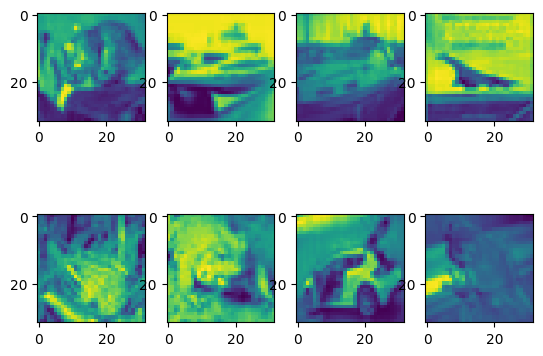

In [32]:
examples = iter(test_loader)
example_data, example_target = next(examples)

for i in range(8):
  plt.subplot(2, 4, (i+1))
  plt.imshow(example_data[i][0])
plt.show()

In [35]:
# define arch
class CIFARConvNet(nn.Module):
  def __init__(self, num_classes):
    super(CIFARConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.conv3 = nn.Conv2d(64, 128, 3)

    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)

    self.fc1 = nn.Linear(128*4*4, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, num_classes)

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu(out)
    out = self.pool(out)

    out = self.conv2(out)
    out = self.relu(out)
    out = self.pool(out)

    out = self.conv3(out)
    out = self.relu(out)
    # out = self.pool(out)

    out = torch.flatten(out, 1)

    out = self.fc1(out)
    out = self.relu(out)

    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)

    return out

# instantiate the model
cifar_model = CIFARConvNet(num_classes)
cifar_model.to(device)

CIFARConvNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [36]:
from torchsummary import summary

print(summary(cifar_model, (3, 30, 30))) # 30 x 30 RGB image

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             896
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 12, 12]          18,496
              ReLU-5           [-1, 64, 12, 12]               0
         MaxPool2d-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
              ReLU-8            [-1, 128, 4, 4]               0
            Linear-9                  [-1, 128]         262,272
             ReLU-10                  [-1, 128]               0
           Linear-11                   [-1, 64]           8,256
             ReLU-12                   [-1, 64]               0
           Linear-13                   [-1, 10]             650
Total params: 364,426
Trainable params:

In [41]:
# train
num_epochs = 15
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cifar_model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    images = images.to(device)
    labels = labels.to(device)

    # forward and loss
    outputs = cifar_model(images)

    loss = criterion(outputs, labels)

    # backward and optimize
    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    if (i+1) % 100 == 0:
      print(f'Epoch: {epoch+1}/{num_epochs}, step [{i+1}/{n_total_steps}], Loss: {loss:.3f}')

Epoch: 1/15, step [100/100], Loss: 0.412
Epoch: 2/15, step [100/100], Loss: 0.339
Epoch: 3/15, step [100/100], Loss: 0.317
Epoch: 4/15, step [100/100], Loss: 0.301
Epoch: 5/15, step [100/100], Loss: 0.293
Epoch: 6/15, step [100/100], Loss: 0.227
Epoch: 7/15, step [100/100], Loss: 0.225
Epoch: 8/15, step [100/100], Loss: 0.201
Epoch: 9/15, step [100/100], Loss: 0.124
Epoch: 10/15, step [100/100], Loss: 0.134
Epoch: 11/15, step [100/100], Loss: 0.161
Epoch: 12/15, step [100/100], Loss: 0.079
Epoch: 13/15, step [100/100], Loss: 0.107
Epoch: 14/15, step [100/100], Loss: 0.053
Epoch: 15/15, step [100/100], Loss: 0.066


In [42]:
#  Test the CNN model
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = cifar_model(images)

    # max returns max value as well as index, index is class
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  accuracy = n_correct / n_samples
  print(f'Accuracy of model on {n_samples} test images: {100*accuracy}')

Accuracy of model on 10000 test images: 70.8
